# Topic: Graph algorithms

## 1. For a randomly generated undirected input graph (the input graph is a text file in such a way that any graph can be entered), examine the time of obtaining information about the existence of edges between a pair of random vertices, for each of the graph representations listed above. Perform tests for all elements randomly selecting individual vertices. Calculate the average search time by adding up the search times for individual elements and dividing this sum by the number of elements (number of vertices in the graph - n, saturation of the graph with edges 0.6). Graph t = f (n) for each representation; on one chart, for each search.

In [166]:
import numpy as np
import random
import matplotlib.pyplot as plt
import time

## Graph generator

Generating random graph (saturation of the graph with edges 0.6)

In [181]:
def genGraph(N):
    adjacencyMatrix = np.tril(np.random.choice([0,1],(N,N), p=[0.4,0.6]),-1)
    for i in range(N):
        for j in range(N):
            if adjacencyMatrix[i][j] == 1:
                adjacencyMatrix[j][i] = 1

    with open('text.txt', 'w+') as file:
        np.savetxt(file,adjacencyMatrix ,fmt='%d')

In [186]:
N = 7
genGraph(N)

## Edge list 

An edge list is a data structure used to represent a graph as a list of its edges.

In [187]:
def edgeLIST():   
    edgeList = []
    adjacencyMatrix = np.loadtxt('text.txt')
    for i in range(len(adjacencyMatrix)):
        for j in range(len(adjacencyMatrix)):
            if adjacencyMatrix[i][j] == 1:
                edgeList.append((i,j))
    return edgeList

In [188]:
edgeList = edgeLIST()
print(edgeList)

[(0, 1), (0, 3), (0, 4), (0, 5), (1, 0), (1, 2), (1, 3), (1, 4), (1, 6), (2, 1), (2, 3), (2, 4), (2, 5), (2, 6), (3, 0), (3, 1), (3, 2), (3, 5), (4, 0), (4, 1), (4, 2), (4, 5), (4, 6), (5, 0), (5, 2), (5, 3), (5, 4), (5, 6), (6, 1), (6, 2), (6, 4), (6, 5)]


### Find edge in "Edge list":

In [189]:
def findEdgeEL(edgeList, start, end):
    if (start,end) in edgeList or (end,start) in edgeList:
        return 'YES'
    else:
        return 'NO'

In [190]:
findEdgeEL(edgeList,2,5)

'YES'

## Adjacency list

In graph theory and computer science, an adjacency list is a collection of unordered lists used to represent a finite graph. Each list describes the set of neighbors of a vertex in the graph. This is one of several commonly used representations of graphs for use in computer programs.

In [191]:
def adjLIST(N, edgeList):    
    adjList = [set([]) for i in range(N)]

    for edge in edgeList:
        start = edge[0]
        end = edge[1]
        adjList[start].add(end)
        
    return adjList

In [192]:
adjList = adjLIST(N, edgeList)

for vertex in range(len(adjList)):
    print(vertex,'',adjList[vertex])

0  {1, 3, 4, 5}
1  {0, 2, 3, 4, 6}
2  {1, 3, 4, 5, 6}
3  {0, 1, 2, 5}
4  {0, 1, 2, 5, 6}
5  {0, 2, 3, 4, 6}
6  {1, 2, 4, 5}


### Find edge in "Adjacency list":

In [193]:
def findEdgeADJL(adjList,start,end):
    if end in adjList[start] or start in adjList[end]:
        return 'YES'
    else:
        return 'NO'

In [11]:
findEdgeADJL(adjList,2,1)

'YES'

## Adjacency matrix

In graph theory and computer science, an adjacency matrix is a square matrix used to represent a finite graph. The elements of the matrix indicate whether pairs of vertices are adjacent or not in the graph.

In [197]:
def adjMATRIX(N):
    adjMatrix = np.loadtxt('text.txt')
    return adjMatrix    

In [198]:
adjMatrix = adjMATRIX(N)
print(adjMatrix)

[[0. 1. 0. 1. 1. 1. 0.]
 [1. 0. 1. 1. 1. 0. 1.]
 [0. 1. 0. 1. 1. 1. 1.]
 [1. 1. 1. 0. 0. 1. 0.]
 [1. 1. 1. 0. 0. 1. 1.]
 [1. 0. 1. 1. 1. 0. 1.]
 [0. 1. 1. 0. 1. 1. 0.]]


### Find edge in "Adjacency matrix":

In [199]:
def findEdgeADJM(adjMatrix, start, end):
    if adjMatrix[start][end] == 1 or adjMatrix[end][start] == 1:
        return 'YES'
    else:
        return 'NO'

In [200]:
findEdgeADJM(adjMatrix, 2, 3)

'YES'

## Incidence Matrix

In mathematics, an incidence matrix is a matrix that shows the relationship between two classes of objects(vertices and edges). If the first class is X and the second is Y, the matrix has one row for each element of X and one column for each element of Y. The entry in row x and column y is 1 if x and y are related (called incident in this context) and 0 if they are not. 

In [201]:
def incMATRIX(N,edgeList):
    INCMatrix = np.zeros((N,len(edgeList)))
    for idx,edge in enumerate(edgeList):
        INCMatrix[edge[0]][idx] = 1
        INCMatrix[edge[1]][idx] = 1
    return INCMatrix


In [202]:
incMatrix = incMATRIX(N,edgeList)
print(incMatrix)

[[1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1.
  0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0.
  0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.
  1. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0.
  0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0.
  0. 0. 1. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1.
  1. 1. 1. 1. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
  0. 0. 0. 1. 1. 1. 1. 1.]]


### Find edge in "Incidence matrix":

In [204]:
def findEdgeINCM(incMatrix,start,end):
    for col in range(len(incMatrix)):
        if incMatrix[start][col] == 1 and incMatrix[end][col] == 1:
            return 'YES'
    return 'NO'

In [205]:
findEdgeINCM(incMatrix,4,0)

'YES'

## Creating time table:

In [ ]:
timeTab = [[] for i in range(4)]

for i in range(0,1200,100):
    sumTab = [[] for i in range(4)]
    N = i 
    
    genGraph(N)
    edgeList = edgeLIST()
    adjList = adjLIST(N, edgeList)
    adjMatrix = adjMATRIX(N)
    incMatrix = incMATRIX(N, edgeList)
    for j in range(N):
        
        start = random.randint(0, N-1)
        end = random.randint(0, N-1)

        TimeEL = time.time()
        findEdgeEL(edgeList, start, end)
        sumTab[0].append(time.time() - TimeEL)

        TimeAL = time.time()
        findEdgeADJL(adjList, start, end)
        sumTab[1].append(time.time() - TimeAL)

        TimeAM = time.time()
        findEdgeADJM(adjMatrix, start, end)
        sumTab[2].append(time.time() - TimeAM)

        TimeIM = time.time()
        findEdgeINCM(incMatrix, start, end)
        sumTab[3].append(time.time() - TimeIM)
    sumTab = np.mean(sumTab, axis=1)
    for idx, t in enumerate(sumTab):
        timeTab[idx].append(t)
    print(N)


### Creaiting chart: t[s] = f(n=(number of vertices))

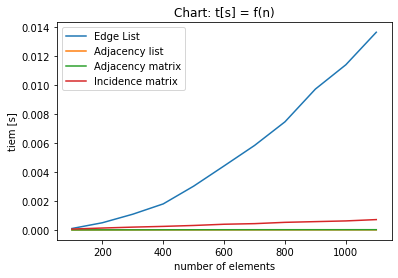

In [253]:
numOfElem = [i for i in range(0,1200,100)]

for i in timeTab:
  plt.plot(numOfElem,list(i))
plt.xlabel("number of elements")
plt.ylabel("tiem [s]")
plt.title("Chart: t[s] = f(n)")
plt.legend(['Edge List','Adjacency list','Adjacency matrix','Incidence matrix'])
plt.show()

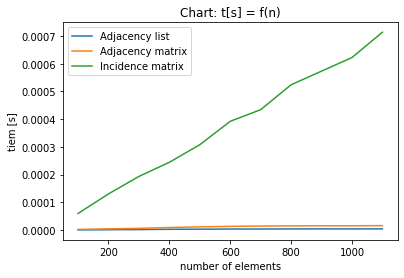

In [254]:
numOfElem = [i for i in range(0,1200,100)]

for i in timeTab[1:]:
  plt.plot(numOfElem,list(i))
plt.xlabel("number of elements")
plt.ylabel("tiem [s]")
plt.title("Chart: t[s] = f(n)")
plt.legend(['Adjacency list','Adjacency matrix','Incidence matrix'])
plt.show()

## 2. For a randomly generated DAG graph (n - vertices and edge saturation factor 0.3), use the topological order sorting procedure. Chart t = f (n) - time to create the sorted sequence. Justify the choice of graph representation. Give the advantages and disadvantages of the selected representation in comparison with the others.

**DAG** - In mathematics, particularly graph theory, and computer science, a directed acyclic graph is a finite directed graph with no directed cycles.

**Directed cycles** - In graph theory, a cycle graph or circular graph is a graph that consists of a single cycle, or in other words, some number of vertices (at least 3) connected in a closed chain.

**Topological sort** - In computer science, a topological sort or topological ordering of a directed graph is a linear ordering of its vertices such that for every directed edge (uv) from vertex u to vertex v, u comes before v in the ordering.

## DAG - Adjacency list

Generating random Directed Acyclic Graph (saturation of the graph with edges 0.3)

In [242]:
def DAGAdjacencyList(N):
    DAG = [set([]) for i in range(N)]
    x = 0
    while x < (N*N-1)*0.5*0.3:
        place = random.randint(0,N-1)
        vertex = random.randint(place,N-1)
        if vertex not in DAG[place]:
            DAG[place].add(random.randint(place,N-1))
            x += 1
    return DAG

In [243]:
N = 10
adjList = DAGAdjacencyList(N)
for vertex in range(len(adjList)):
    print(vertex,'',adjList[vertex])

0  {9, 7}
1  {4, 6}
2  {9, 4}
3  {9, 6}
4  {7}
5  {5}
6  {7}
7  set()
8  {9}
9  {9}


### Topological Sorting for "Adjacency list":

In [244]:
def TopoSortADJMatrix(i, visited, sortedList, graph):
    visited[i] = True
    for j in graph[i]:

        if visited[j] == False:
            TopoSortADJMatrix(j, visited, sortedList, graph)
    sortedList.insert(0, i)


def TopologicalSortADJMatrix(graph):
    number = len(graph)
    visited = [False for i in range(number)]
    sortedGraph = []
    for i in range(number):
        x = visited[i]
        if visited[i] == False:
            TopoSortADJMatrix(i, visited, sortedGraph, graph)
    return sortedGraph

In [245]:
print(TopologicalSortADJMatrix(adjList))

[8, 5, 3, 2, 1, 6, 4, 0, 7, 9]


## DAG - Edge List

In [246]:
def DAGEdgeList(adjList):
    edgeList = []
    for idx, vertex in enumerate(adjList):
        for i in vertex:
            edgeList.append([idx,i])
    return(edgeList)


edgeList = DAGEdgeList(adjList)
print(edgeList)

[[0, 9], [0, 7], [1, 4], [1, 6], [2, 9], [2, 4], [3, 9], [3, 6], [4, 7], [5, 5], [6, 7], [8, 9], [9, 9]]


### Topological Sorting for "Edge list":

In [247]:
def TopoSortEdgelist(i, visited, sortedList, graph): 
    found = False                                   
    not_leaf=False                                
    for j in graph:
        if j[0]==i:
            if visited[j[1]] == False and j[0] != j[1]:
                found=True
                TopoSortEdgelist(j[1], visited, sortedList, graph)
 
    if found==False:
        sortedList.insert(0,i)
        visited[i] = True
    if found==True and not_leaf==False:
        sortedList.insert(0,i)
        visited[i] = True

        
def TopologicalSortEdgeList(size, graph):
    visited = [False for i in range(size)]
    sortedGraph = []
    for i in range(size):
        if visited[i] == False:
            TopoSortEdgelist(i, visited, sortedGraph, graph)
    return sortedGraph


print(TopologicalSortEdgeList(N, edgeList))

[8, 5, 3, 2, 1, 6, 4, 0, 7, 9]


## DAG - Incidence matrix

In [248]:
def DAGincMATRIX(N,edgeList):
    INCMatrix = np.zeros((N,len(edgeList)))
    for idx, edge in enumerate(edgeList):
        INCMatrix[edge[0]][idx] = -1
        INCMatrix[edge[1]][idx] = 1
    return INCMatrix


incMatrix = DAGincMATRIX(N,edgeList)
print(incMatrix)

[[-1. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. -1. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. -1. -1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. -1. -1.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  1.  0.  0. -1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  1.  0.  0. -1.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  1.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  0.]
 [ 1.  0.  0.  0.  1.  0.  1.  0.  0.  0.  0.  1.  1.]]


### Topological Sorting for "Incidence Matrix":

In [249]:
def TopoSortINCMatrix(i,visited,sortedGraph,incMatrix):
    visited[i] = True
    row = []
    for idx,col in enumerate(incMatrix[i]):
        if col == -1:
            edge = list(incMatrix[:,idx])
            num = edge.index(1)

            if visited[num] == False:
                TopoSortINCMatrix(num,visited,sortedGraph,incMatrix)
    sortedGraph.insert(0,i)


def TopologicalSortINCMatrix(incMatrix):
    visited = [False for i in range(len(incMatrix))]
    sortedGraph = []    
    for i in range(len(incMatrix)):
        if visited[i] == False:
            TopoSortINCMatrix(i,visited,sortedGraph,incMatrix)
    return(sortedGraph)


print(TopologicalSortINCMatrix(incMatrix))

[8, 5, 3, 2, 1, 6, 4, 0, 7, 9]


## DAG - Adjacency matrix

In [250]:
def DAGadjMATRIX(adjList):
    ADJMatrix = np.zeros((N,N))
    for vertex in range(len(adjList)):
        for edge in adjList[vertex]:
            ADJMatrix[vertex][edge] = 1
    return ADJMatrix


ADJMatrix = DAGadjMATRIX(adjList)
print(ADJMatrix)

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 1.]
 [0. 0. 0. 0. 1. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


### Topological Sorting for "Adjacency Matrix":

In [251]:
def TopoSortADJMatrix(i, visited, sortedGraph, graph):
    visited[i]=True
    row = []
    for idx,col in enumerate(graph[i]):
        if col == 1:
            if visited[idx] == False:
                TopoSortADJMatrix(idx, visited, sortedGraph, graph)
    sortedGraph.insert(0,i) 
    
    
def TopologicalSortADJMatrix(graph):
    visited = [False for i in range(len(graph))]
    sortedGraph = []
    for i in range(len(graph)):
        if visited[i] == False:
            TopoSortADJMatrix(i, visited, sortedGraph, graph)
    return sortedGraph
    
    
print(TopologicalSortADJMatrix(ADJMatrix))

[8, 5, 3, 2, 1, 6, 4, 0, 9, 7]


## Creating time table:

In [255]:
timeTab = [[] for i in range(4)]

for i in range(0,1100,100):
    sumTab = [[] for i in range(4)]
    N = i 
    
    adjList = DAGAdjacencyList(N)
    edgeList = DAGEdgeList(adjList)
    incMatrix = DAGincMATRIX(N,edgeList)
    ADJMatrix = DAGadjMATRIX(adjList)
    for j in range(10):
        TimeEL = time.time()
        TopologicalSortEdgeList(N, edgeList)
        sumTab[0].append(time.time() - TimeEL)

        TimeAL = time.time()
        TopologicalSortADJMatrix(adjList)
        sumTab[1].append(time.time() - TimeAL)

        TimeAM = time.time()
        TopologicalSortADJMatrix(ADJMatrix)
        sumTab[2].append(time.time() - TimeAM)

        TimeIM = time.time()
        TopologicalSortINCMatrix(incMatrix)
        sumTab[3].append(time.time() - TimeIM)
    sumTab = np.mean(sumTab, axis=1)
    for idx, t in enumerate(sumTab):
        timeTab[idx].append(t)
    print(N)

0
100
200
300
400
500
600
700
800
900
1000


## Creaiting chart: t[s] = f(n=(number of vertices))

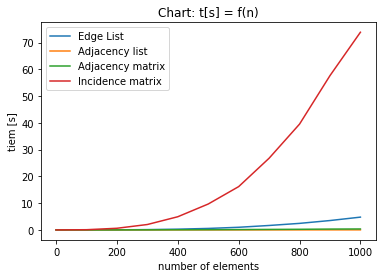

In [256]:
numOfElem = [i for i in range(0,1100,100)]

for i in timeTab:
  plt.plot(numOfElem,list(i))
plt.xlabel("number of elements")
plt.ylabel("tiem [s]")
plt.title("Chart: t[s] = f(n)")
plt.legend(['Edge List','Adjacency list','Adjacency matrix','Incidence matrix'])
plt.show()

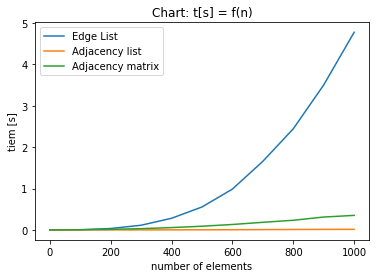

In [257]:
numOfElem = [i for i in range(0,1100,100)]

for i in timeTab[:3]:
    plt.plot(numOfElem,list(i))
plt.xlabel("number of elements")
plt.ylabel("tiem [s]")
plt.title("Chart: t[s] = f(n)")
plt.legend(['Edge List','Adjacency list','Adjacency matrix'])
plt.show()

## 3. Formulate conclusions regarding the effectiveness of each graph representation and the problem of topological order.

**Edge list** - The easiest graph representation to implement, but achieves the worst results. Since each edge contains just two numbers, the total space for an edge list is O(E) (E-number of edges).


**Incidence matrix** - Representation which is worse than "Adjacency Matrix" but definitely better than "Edge list" in finding edge between two vertices. It is definitely the worst graph representation in topological sorting process.

**Adjacency matrix** - Graph representation which has similar results in looking for specific edge, but in topological sorting has worse score, but it takes O(V^2) space, even if the graph is sparse: relatively few edges. If ours graph has small saturation of the graph with edges it still use lots of space to represent only a few edges. It is fast to lookup and check for presence or absence of a specific edge
between any two nodes O(1)

**Adjacency list** - In my opinion the best representation of any graph. This representation is pleasant to implement, obtains the best results and is the easiest to read by human. Memory usage depends on the number of edges (not number of nodes), which might save a lot of memory if the adjacency matrix is sparse. It is fast to iterate over all edges because you can access any node neighbors directly. It is better for sparse graphs where an adjacency matrix would take up too much space that is only filled with zero.

**Conclusion**

If we need to implement some graph in any program, whe should choose between "Adjacency list" or "Adjacency matrix". Our choice should depends primarily on saturation of edges in graph, because  propably we could wasted to much space for our graph. However, if we need to create a DAG the better choice will be "Adjacency List", because it gives more efficient results for "Topological sort" and it is easier to implement.   

Created by: Bartosz Maślanka